# Insertion of required python modules

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.formula.api import ols


In [2]:
data = pd.read_csv('brain_size.csv', sep=';', na_values=".")

In [3]:
data.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


In [4]:
t = np.linspace(-6, 6, 20)

In [5]:
sin_t = np.sin(t)
cos_t = np.cos(t)

In [6]:
pd.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t})

,t,sin,cos
0,-6.000000,0.279415,0.960170
1,-5.368421,0.792419,0.609977
2,-4.736842,0.999701,0.024451
3,-4.105263,0.821291,-0.570509
4,-3.473684,0.326021,-0.945363
5,-2.842105,-0.295030,-0.955488
6,-2.210526,-0.802257,-0.596979
7,-1.578947,-0.999967,-0.008151
8,-0.947368,-0.811882,0.583822
9,-0.315789,-0.310567,0.950551


## lists number of rows, columns

In [7]:
data.shape 

(40, 8)

**lists names of columns and prints values of selected columns** 

In [8]:
data.columns

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

In [9]:
print(data['Gender'])

0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object


**outputting the mean value of VIQ of all of the female from the gender column**

In [10]:
data[data['Gender'] == 'Female']['VIQ'].mean()

109.45

**comparing the means of data from categorical variables**

In [11]:
groupby_gender = data.groupby('Gender')

In [12]:
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', 109.45)
('Male', 115.25)


**universal grouping of data**

In [13]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


# mean VIQ value for population

In [14]:
data.VIQ.mean()

112.35

# total number of female and male subjects

In [15]:
groupby_gender.count()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,20,20,20,20,20,20,20
Male,20,20,20,20,18,19,20


# values of average MRI in log

In [16]:
 for gender, value in groupby_gender['MRI_Count']:
    print((gender, value.mean())) 

('Female', 862654.6)
('Male', 954855.4)


In [17]:
fmMRI=862654.6

In [18]:
mlMRI=954855.4


In [19]:
"{:e}".format(862654.6)

'8.626546e+05'

In [20]:
"{:e}".format(mlMRI)

'9.548554e+05'

In [24]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='Weight', ylabel='Weight'>,
        <AxesSubplot:xlabel='Height', ylabel='Weight'>,
        <AxesSubplot:xlabel='MRI_Count', ylabel='Weight'>],
       [<AxesSubplot:xlabel='Weight', ylabel='Height'>,
        <AxesSubplot:xlabel='Height', ylabel='Height'>,
        <AxesSubplot:xlabel='MRI_Count', ylabel='Height'>],
       [<AxesSubplot:xlabel='Weight', ylabel='MRI_Count'>,
        <AxesSubplot:xlabel='Height', ylabel='MRI_Count'>,
        <AxesSubplot:xlabel='MRI_Count', ylabel='MRI_Count'>]],
      dtype=object)

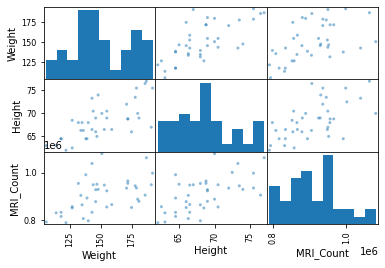

In [26]:
scatter_matrix(data[['Weight', 'Height', 'MRI_Count']]) 

array([[<AxesSubplot:xlabel='PIQ', ylabel='PIQ'>,
        <AxesSubplot:xlabel='VIQ', ylabel='PIQ'>,
        <AxesSubplot:xlabel='FSIQ', ylabel='PIQ'>],
       [<AxesSubplot:xlabel='PIQ', ylabel='VIQ'>,
        <AxesSubplot:xlabel='VIQ', ylabel='VIQ'>,
        <AxesSubplot:xlabel='FSIQ', ylabel='VIQ'>],
       [<AxesSubplot:xlabel='PIQ', ylabel='FSIQ'>,
        <AxesSubplot:xlabel='VIQ', ylabel='FSIQ'>,
        <AxesSubplot:xlabel='FSIQ', ylabel='FSIQ'>]], dtype=object)

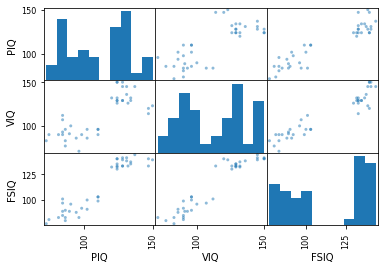

In [27]:
scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])

/tmp/slurmtmp.29898737/ipykernel_46294/2457699958.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  for gender, value in groupby_gender ['PIQ', 'VIQ', 'FSIQ']: scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])


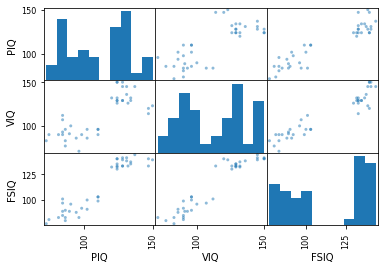

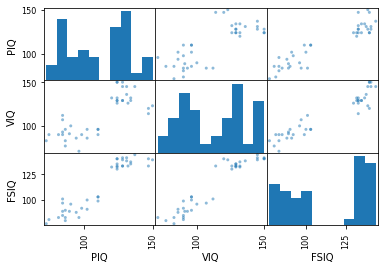

In [42]:
for gender, value in groupby_gender ['PIQ', 'VIQ', 'FSIQ']: scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])

In [43]:
stats.ttest_1samp(data['VIQ'], 0)   


Ttest_1sampResult(statistic=3.0088099970849328e+01, pvalue=1.3289196468728067e-28)

In [44]:
female_viq = data[data['Gender'] == 'Female']['VIQ']

In [45]:
male_viq = data[data['Gender'] == 'Male']['VIQ']

In [46]:
stats.ttest_ind(female_viq, male_viq)

Ttest_indResult(statistic=-0.7726161723275011, pvalue=0.44452876778583217)

In [47]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])   

Ttest_indResult(statistic=0.465637596380964, pvalue=0.6427725009414841)

In [48]:
stats.ttest_rel(data['FSIQ'], data['PIQ'])

Ttest_relResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

In [49]:
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)   

Ttest_1sampResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

In [50]:
stats.wilcoxon(data['FSIQ'], data['PIQ'])   


WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)

In [51]:
female_wt = data[data['Gender'] == 'Female']['Weight']

In [52]:
male_wt = data[data['Gender'] == 'Male']['Weight']

In [54]:
stats.ttest_ind(male_wt, female_wt)

Ttest_indResult(statistic=nan, pvalue=nan)